<a href="https://colab.research.google.com/github/harsh02raj/SENTIMENT-ANALYSIS-/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import Restaurant Reviews Dataset 
df=pd.read_table("/content/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.describe(),df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


(            Liked
 count  1000.00000
 mean      0.50000
 std       0.50025
 min       0.00000
 25%       0.00000
 50%       0.50000
 75%       1.00000
 max       1.00000, None)

In [ ]:
df.shape[0],df.shape[1]#number of rows and colums


(1000, 2)

In [ ]:
df['Liked'].nunique() #nunique() method gives the number of unique values in the particular column


2

In [ ]:
df['Liked'].value_counts() #value_counts() method gives the number of times the particular value repeated in that column through the data frame.

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.head(),df.tail() #first 5 and last 5 entries of the data frame.

(                                              Review  Liked
 0                           Wow... Loved this place.      1
 1                                 Crust is not good.      0
 2          Not tasty and the texture was just nasty.      0
 3  Stopped by during the late May bank holiday of...      1
 4  The selection on the menu was great and so wer...      1,
                                                 Review  Liked
 995  I think food should have flavor and texture an...      0
 996                           Appetite instantly gone.      0
 997  Overall I was not impressed and would not go b...      0
 998  The whole experience was underwhelming, and I ...      0
 999  Then, as if I hadn't wasted enough of my life ...      0)

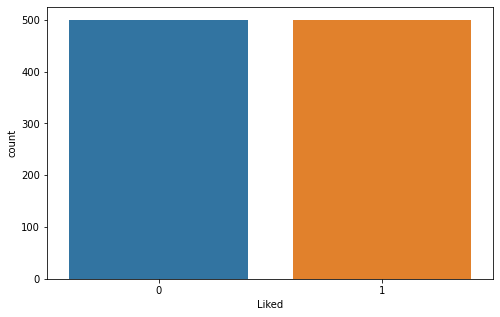

In [ ]:
#Visualizations
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [ ]:
#Defining X and Y, X is the input feature that we give to the model, and Y is the output that the model should predict.
x=df['Review'].values
y=df['Liked'].values


In [ ]:
from sklearn.model_selection import train_test_split
#splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [ ]:
x_train.shape,y_train.shape

((750,), (750,))

In [ ]:
x_test.shape,y_test.shape

((250,), (250,))

In [ ]:
#count vectorizer:This count vectorizer transforms the text into a vector based on the count of the words like the number of times the word is repeated in the sentence.
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')


In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
#SVM:It helps to find a hyperplane in a N-D space that distinctly classifies the data points
model=SVC()
model.fit(x_train_vect,y_train)
y_pred=model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [ ]:
#PIPELINE: pipeline is used whenever we use multiple methods, classes, or models together.
from sklearn.pipeline import make_pipeline
model1=make_pipeline(CountVectorizer(),SVC())
model1.fit(x_train,y_train)#Train the Model with Training Sets
y_pred2=model1.predict(x_test)#Predicting the test results
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
#evaluating our new model using accuracy_method.
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
#Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP).
#It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
model2.fit(x_train_vect,y_train)#Train the Model with Training Sets
y_pred2=model2.predict(x_test_vect)#Predicting the test results
y_pred2

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(y_pred2,y_test)

0.744

In [ ]:
from sklearn.pipeline import make_pipeline
model3=make_pipeline(CountVectorizer(),MultinomialNB())
model3.fit(x_train,y_train)#Train the Model with Training Sets
y_pred3=model3.predict(x_test)#Predicting the test results
y_pred3

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(y_pred3,y_test)

0.784

In [ ]:
#ACCURACY SCORE FOR ALL 4 MODELS:
#SVC- 0.72
#SVC PIPELINE- 0.792
#MultinomialNB- 0.744
#MultinomialNB PIPELINE- 0.784

In [ ]:
import joblib #it is similar to pickle but is more advanced 
joblib.dump(model1,'Restaurant-Review') #creating file for the best model for prediction

['Restaurant-Review']

In [ ]:
text_model=joblib.load('Restaurant-Review')#reloading the created model for prediction
text_model.predict(['hi!It was very good to visit here.I loved the food'])
#we are using joblib model to predict the final output

array([1])

In [ ]:
text_model.predict(['worst food!  '])

array([0])

In [ ]:
text_model.predict(["wow!!! very bad food "])

array([0])

In [ ]:
text_model.predict(["VERY BAD FOOD "])


array([0])

In [ ]:
!pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 5.4 MB/s 
     |████████████████████████████████| 182 kB 66.0 MB/s 
     |████████████████████████████████| 164 kB 44.0 MB/s 
     |████████████████████████████████| 237 kB 50.2 MB/s 
     |████████████████████████████████| 4.7 MB 52.7 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=7d0bd116f23e5461b51d5fd4cb7de780cb9b8a04e2354a741813d7f2df1a3438
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
!pip install tornado==5.1.0

In [ ]:
%%writefile MajorProject.py
import streamlit as st

Writing MajorProject.py


In [ ]:
st.title("Majaor Project")
st.subheader("hello")
st.write("Harsh 1234")

In [ ]:
!streamlit run MajorProject.py & npx localtunnel --port 8501

2022-07-12 18:28:59.337 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.61s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.240.12:8501

your url is: https://quiet-maps-drive-35-245-240-12.loca.lt
  Stopping...
^C


In [ ]:
review=st.slider('Please rate us out of 10')
st.write("We got ",review,"!Thanks for coming")
!streamlit run MajorProject.py & npx localtunnel --port 8501


In [ ]:
#SENTIMENT ANALYSIS: It is used to detect or recognize the sentiment which is contained in the text.
                    #This analysis helps us to get the reference of our text which means we can understand that the content is positive, negative, or neutral.
                    #It is a use case of Natural Language Processing (NLP) and comes under the category of text classification. 
                    #To put it simply, Sentiment Analysis involves classifying a text into various sentiments, such as positive or negative, Happy, Sad or Neutral, etc.
                    # Thus, the ultimate goal of sentiment analysis is to decipher the underlying mood, emotion, or sentiment of a text. This is also known as Opinion Mining.

                    #Some use cases are:  Social Media Monitoring for Brand Management,Product/Service Analysis,Stock Price Prediction.
                    # Ways to Perform Sentiment Analysis in Python:Using Text Blob,Vader,Bag of Words Vectorization-based Models,LSTM-based Models,Transformer-based Models.
  


#TWITTER SENTIMENT ANALYSIS: It s a subset of social media sentiment analysis, helps firms to understand their audience on social channels, stay on top of what’s being said about their brand 
                             #and their rivals and uncover new trends in the market by carefully listening to the voice of the consumer on Twitter.
                             #It is a technique widely used in text mining. Twitter Sentiment Analysis, therefore means, using advanced text mining techniques to analyze 
                             #the sentiment of the text (here, tweet) in the form of positive, negative and neutral. It is also known as Opinion Mining, is primarily for analyzing conversations, 
                             #opinions, and sharing of views (all in the form of tweets) for deciding business strategy, political analysis, and also for assessing public actions.
                             #As a part of Natural Language Processing, algorithms like SVM, Naive Bayes is used in predicting the polarity of the sentence.
                             # sentiment analysis of Twitter data may also depend upon sentence level and document level
 
                             #Analysis of Twitter Sentiment using Python can be done through popular Python libraries like Tweepy and TextBlob.
                             #A report from Market Research Future claims that the global Sentiment Analytics market is expected to grow to USD 6 billion by 2027.
                             # With its ability to deliver invaluable insights about customer behavior and target audience persona,
                             # Sentiment Analysis is sure to be a part of the Twitter marketing strategy of corporates for the foreseeable future.